In [1]:
import numpy as np
import matplotlib.pyplot as plt

from alpub_autoencoder.autoencoder_utils import read_alpub_data
from PIL import Image

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
ALPUB_PATH = '../../Datasets/alpub_v2/images'

In [3]:
X,Y = read_alpub_data(path=ALPUB_PATH)

Processing Alpha
Processing Beta
Processing Chi
Processing Delta
Processing Epsilon
Processing Eta
Processing Gamma
Processing Iota
Processing Kappa
Processing Lambda
Processing LunateSigma
Processing Mu
Processing Nu
Processing Omega
Processing Omicron
Processing Phi
Processing Pi
Processing Psi
Processing Rho
Processing Tau
Processing Theta
Processing Upsilon
Processing Xi
Processing Zeta


In [4]:
Y.shape

(205797, 24)

In [5]:
X.shape

(205797, 70, 70, 3)

In [6]:
# Convert the RGB images to grayscale
X_gray = []
for img in X:
    image_gray = Image.fromarray(img).convert("L")
    X_gray.append(np.array(image_gray))

In [290]:
# Load the greyscaled image

image_no = 126456
image = X_gray[image_no]

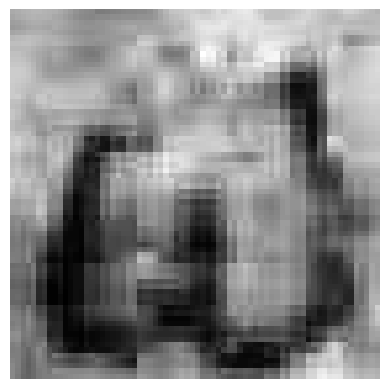

In [291]:
# Display the grayscale image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [292]:
import cv2

In [293]:
# Apply median smoothing

image = cv2.medianBlur(image, 3)

# Apply Gaussian smoothing
image = cv2.GaussianBlur(image, (3, 3), 0)

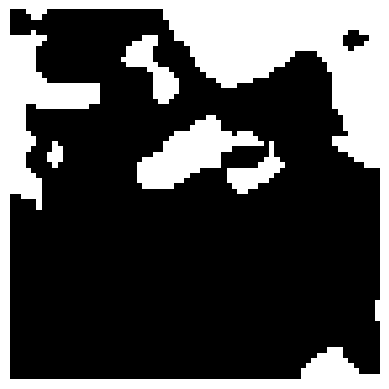

In [294]:
# Apply global thresholding

threshold_value = 75  # Threshold value
max_value = 255  # Maximum value after thresholding
_, thresholded_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)

# Display the thresholded image
plt.imshow(thresholded_image, cmap="gray")
plt.axis("off")
plt.show()

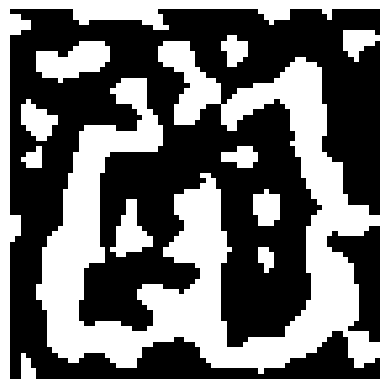

In [295]:
# Apply adaptive thresholding

# Set the blockSize and C parameters as per your requirements
adapt_thresholded_image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)

adapt_thresholded_image = cv2.bitwise_not(adapt_thresholded_image)

# Display the thresholded image
plt.imshow(adapt_thresholded_image, cmap="gray")
plt.axis("off")
plt.show()

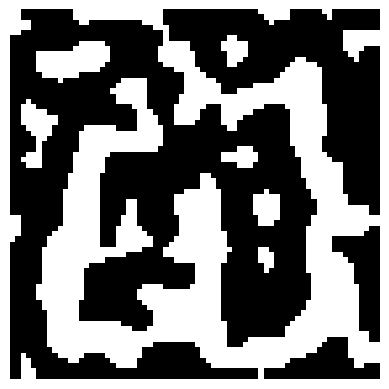

In [296]:
# Define the structuring element for erosion and dilation
kernel = np.ones((3, 3), np.uint8)

# Perform dilation
seg_image = cv2.dilate(adapt_thresholded_image, kernel, iterations=1)

# Perform erosion
seg_image = cv2.erode(seg_image, kernel, iterations=1)

# Display the segmented image
plt.imshow(seg_image, cmap="gray")
plt.axis("off")
plt.show()

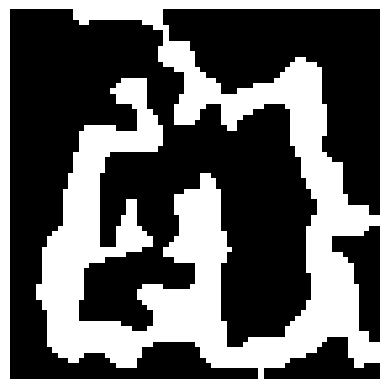

In [297]:
#Remove disconnected regions

# Perform connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(seg_image)

# Remove small disconnected regions
min_region_size = 200  # Minimum region size to keep

# Create a mask to filter out small regions
mask = np.zeros_like(seg_image, dtype=np.uint8)

for label in range(1, num_labels):

    region_size = stats[label, cv2.CC_STAT_AREA]

    if region_size >= min_region_size:
        mask[labels == label] = 255

# Apply the mask to the segmented image
filtered_image = cv2.bitwise_and(seg_image, mask)

# Display the filtered image
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")
plt.show()

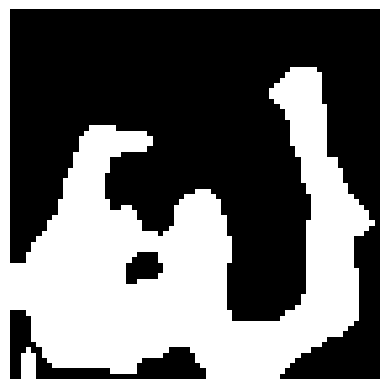

In [298]:
#Otsu's thresholding

# Find the threshold value using Otsu's method
_, threshold_value = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply the thresholding
thresholded_image = np.where(image > threshold_value, 255, 0).astype(np.uint8)

# Display the thresholded image
plt.imshow(thresholded_image, cmap="gray")
plt.axis("off")
plt.show()

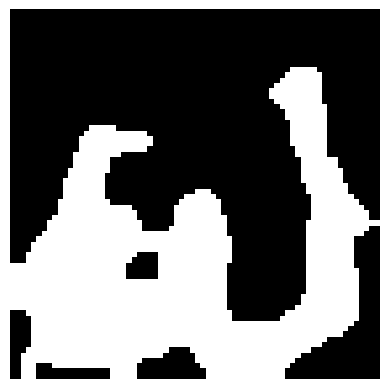

In [299]:
# Perform erosion and dialation

# Define the structuring element for erosion and dilation
kernel = np.ones((3, 3), np.uint8)

# Perform dilation
seg_image = cv2.dilate(thresholded_image, kernel, iterations=1)

# Perform erosion
seg_image = cv2.erode(seg_image, kernel, iterations=1)



# Display the segmented image
plt.imshow(seg_image, cmap="gray")
plt.axis("off")
plt.show()

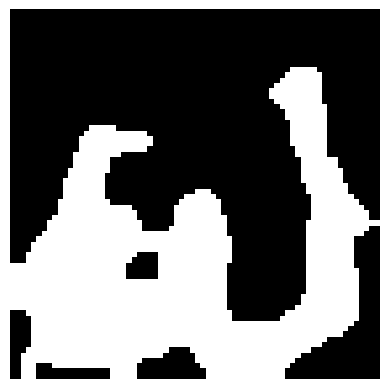

In [300]:
#Remove disconnected regions

# Perform connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(seg_image)

# Remove small disconnected regions
min_region_size = 200  # Minimum region size to keep

# Create a mask to filter out small regions
mask = np.zeros_like(seg_image, dtype=np.uint8)

for label in range(1, num_labels):

    region_size = stats[label, cv2.CC_STAT_AREA]

    if region_size >= min_region_size:
        mask[labels == label] = 255

# Apply the mask to the segmented image
filtered_image = cv2.bitwise_and(seg_image, mask)

# Display the filtered image
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")
plt.show()

In [324]:
# Trying some pretrained segmentation models

import torch
from torchvision import models
from torchvision.transforms import functional as F
from PIL import Image

In [325]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True)
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [366]:
# Load the greyscaled image

image_no = 12
image = X[image_no]

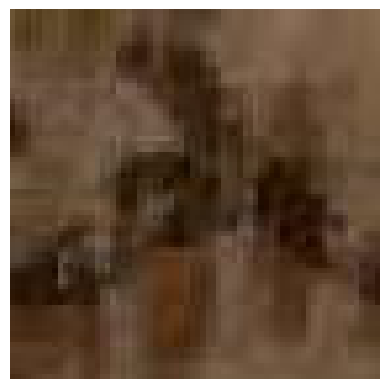

In [367]:
# Display image
plt.imshow(image)
plt.axis("off")
plt.show()

In [368]:
image = cv2.resize(image, (513, 513))

In [369]:
image.shape

(513, 513, 3)

In [370]:
image = F.to_tensor(image).unsqueeze(0)

In [371]:
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [372]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [373]:
with torch.no_grad():
    output = model(image)['out']

In [374]:
_, predicted = torch.max(output, 1)
predicted = predicted.squeeze(0).cpu().numpy()

In [375]:
mask = Image.fromarray(predicted.astype('uint8'))

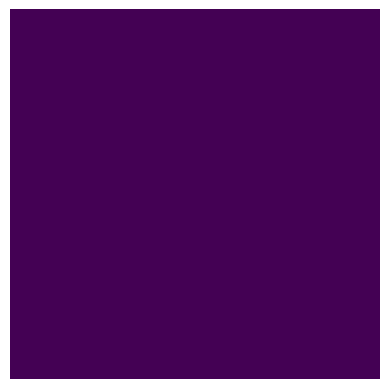

In [376]:
# Display image
plt.imshow(mask)
plt.axis("off")
plt.show()

0